## Student Name: **Cornelius Brian Loe**
## Student ID: **45710783**
## Github Repo URL = https://github.com/MQCOMP2200-S2-2020/portfolio-2020-BrianLoe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

## Predicting the Genre of Books from Summaries

We'll use a set of book summaries from the [CMU Book Summaries Corpus](http://www.cs.cmu.edu/~dbamman/booksummaries.html) in this experiment.  This contains a large number of summaries (16,559) and includes meta-data about the genre of the books taken from Freebase.  Each book can have more than one genre and there are 227 genres listed in total.  To simplify the problem of genre prediction we will select a small number of target genres that occur frequently in the collection and select the books with these genre labels.  This will give us one genre label per book. 

Your goal in this portfolio is to take this data and build predictive models to classify the books into one of the five target genres.  You will need to extract suitable features from the texts and select suitable models to classify them. You should build and evaluate at least TWO models and compare the prediction results.

You should report on each stage of your experiment as you work with the data.


## Data Preparation

The first task is to read the data. It is made available in tab-separated format but has no column headings. We can use `read_csv` to read this but we need to set the separator to `\t` (tab) and supply the column names.  The names come from the [ReadMe](data/booksummaries/README.txt) file.

In [2]:
names = ['wid', 'fid', 'title', 'author', 'date', 'genres', 'summary']

books = pd.read_csv("data/booksummaries/booksummaries.txt", sep="\t", header=None, names=names, keep_default_na=False)
books.head()

,wid,fid,title,author,date,genres,summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,,,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...


We next filter the data so that only our target genre labels are included and we assign each text to just one of the genre labels.  It's possible that one text could be labelled with two of these labels (eg. Science Fiction and Fantasy) but we will just assign one of those here. 

In [3]:
target_genres = ["Children's literature",
                 'Science Fiction',
                 'Novel',
                 'Fantasy',
                 'Mystery']

# create a Series of empty strings the same length as the list of books
genre = pd.Series(np.repeat("", books.shape[0]))
# look for each target genre and set the corresponding entries in the genre series to the genre label
for g in target_genres:
    genre[books['genres'].str.contains(g)] = g

# add this to the book dataframe and then select only those rows that have a genre label
# drop some useless columns
books['genre'] = genre
genre_books = books[genre!=''].drop(['genres', 'fid', 'wid'], axis=1)

genre_books.shape


(8954, 5)

In [4]:
genre_books.head()

,title,author,date,summary,genre
0,Animal Farm,George Orwell,1945-08-17,"Old Major, the old boar on the Manor Farm, ca...",Children's literature
1,A Clockwork Orange,Anthony Burgess,1962,"Alex, a teenager living in near-future Englan...",Novel
2,The Plague,Albert Camus,1947,The text of The Plague is divided into five p...,Novel
4,A Fire Upon the Deep,Vernor Vinge,,The novel posits that space around the Milky ...,Fantasy
6,A Wizard of Earthsea,Ursula K. Le Guin,1968,"Ged is a young boy on Gont, one of the larger...",Fantasy


In [5]:
# check how many books we have in each genre category
genre_books.groupby('genre').count()


,title,author,date,summary
genre,,,,
Children's literature,1092,1092,1092,1092
Fantasy,2311,2311,2311,2311
Mystery,1396,1396,1396,1396
Novel,2258,2258,2258,2258
Science Fiction,1897,1897,1897,1897


## Feature Extraction

Now you take over to build a suitable model and present your results.

Firstly, you need to perform feature extraction to produce feature vectors for the predictive models.

In [6]:
vectorizer = TfidfVectorizer(max_features=4000)
X = vectorizer.fit_transform(genre_books.summary).toarray()
X.shape

(8954, 4000)

In [7]:
print(vectorizer.get_feature_names())

['000', '10', '100', '11', '12', '13', '14', '15', '16', '17', '18', '19th', '20', '200', '20th', '24', '30', '34', '39', '40', 'abandon', 'abandoned', 'abandons', 'abbey', 'abbot', 'abducted', 'abilities', 'ability', 'able', 'aboard', 'about', 'above', 'absence', 'abuse', 'abusive', 'academy', 'accept', 'accepted', 'accepts', 'access', 'accident', 'accidentally', 'accompanied', 'accompanies', 'accompany', 'according', 'account', 'accused', 'accuses', 'achieve', 'acquaintance', 'across', 'act', 'acting', 'action', 'actions', 'active', 'activities', 'actor', 'actress', 'acts', 'actual', 'actually', 'ad', 'adam', 'addition', 'address', 'admiral', 'admit', 'admits', 'adopt', 'adopted', 'adrian', 'adult', 'adults', 'advance', 'advanced', 'advances', 'advantage', 'adventure', 'adventures', 'advice', 'affair', 'affairs', 'affected', 'affection', 'afraid', 'africa', 'african', 'afsan', 'after', 'aftermath', 'afternoon', 'afterward', 'afterwards', 'again', 'against', 'age', 'aged', 'agency', '

In [8]:
labels=vectorizer.get_feature_names()

In [9]:
summ=pd.DataFrame(X, columns=labels, index=genre_books.index)
summ.head()

,000,10,100,11,12,13,14,15,16,17,...,young,younger,youngest,your,youth,yuuzhan,zero,zoey,zone,zoo
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.017909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.032637,0.033548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.017243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.203797,0.0
6,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


## Label Encoding for Genres

First, joining the summary to genre_books.

In [10]:
genre_books1=genre_books.drop(['title', 'author', 'date'], axis=1).copy()
genre_books1=genre_books1.join(summ)

In [11]:
genre_books1.head()

,summary,genre,000,10,100,11,12,13,14,15,...,young,younger,youngest,your,youth,yuuzhan,zero,zoey,zone,zoo
0,"Old Major, the old boar on the Manor Farm, ca...",Children's literature,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,"Alex, a teenager living in near-future Englan...",Novel,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.017909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,The text of The Plague is divided into five p...,Novel,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,The novel posits that space around the Milky ...,Fantasy,0.032637,0.033548,0.0,0.0,0.0,0.0,0.0,0.0,...,0.017243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.203797,0.0
6,"Ged is a young boy on Gont, one of the larger...",Fantasy,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


Next, label encoding the genres so it became numerical.

In [12]:
le_genres=LabelEncoder()
genres_df=genre_books1['genre']
genres_df=le_genres.fit_transform(genres_df)
genres_df=pd.DataFrame(genres_df, columns=['genre_code'], index=genre_books1.index)
genres_df.head()

,genre_code
0,0
1,3
2,3
4,1
6,1


In [13]:
genre_books1=genre_books1.join(genres_df)
genre_books1.head()

,summary,genre,000,10,100,11,12,13,14,15,...,younger,youngest,your,youth,yuuzhan,zero,zoey,zone,zoo,genre_code
0,"Old Major, the old boar on the Manor Farm, ca...",Children's literature,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
1,"Alex, a teenager living in near-future Englan...",Novel,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,3
2,The text of The Plague is divided into five p...,Novel,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,3
4,The novel posits that space around the Milky ...,Fantasy,0.032637,0.033548,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.203797,0.0,1
6,"Ged is a young boy on Gont, one of the larger...",Fantasy,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1


## Model Training

Then, train two predictive models from the given data set.

In [14]:
train, test = train_test_split(genre_books1, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(7163, 4003)
(1791, 4003)


In [15]:
train.head()

,summary,genre,000,10,100,11,12,13,14,15,...,younger,youngest,your,youth,yuuzhan,zero,zoey,zone,zoo,genre_code
16377,"While Simon is being reunited with the Heaps,...",Fantasy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10804,Seven-year-old Anwell lives in a prestigious ...,Mystery,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
10415,Sten and Alex are now POWs in a Tahn prison c...,Science Fiction,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
15205,In the final adventure set on the Jovian moon...,Fantasy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
15389,Dossouye is a fix-up novel created from the s...,Fantasy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [16]:
# Checking how many books we have in each genre in test set
test.groupby('genre').count()

,summary,000,10,100,11,12,13,14,15,16,...,younger,youngest,your,youth,yuuzhan,zero,zoey,zone,zoo,genre_code
genre,,,,,,,,,,,,,,,,,,,,,
Children's literature,237,237,237,237,237,237,237,237,237,237,...,237,237,237,237,237,237,237,237,237,237
Fantasy,453,453,453,453,453,453,453,453,453,453,...,453,453,453,453,453,453,453,453,453,453
Mystery,271,271,271,271,271,271,271,271,271,271,...,271,271,271,271,271,271,271,271,271,271
Novel,430,430,430,430,430,430,430,430,430,430,...,430,430,430,430,430,430,430,430,430,430
Science Fiction,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400


In [17]:
# Identifying the variables to be use
X_train=train.drop(['summary', 'genre',
                    'genre_code'], axis=1)
y_train=train['genre_code']
X_test=test.drop(['summary', 'genre',
                    'genre_code'], axis=1)
y_test=test['genre_code']

print("X_train =",X_train.shape)
print("y_train =",y_train.shape)
print("X_test =",X_test.shape)
print("y_test =",y_test.shape)

print(X_train.head())
print(y_train.head())

X_train = (7163, 4000)
y_train = (7163,)
X_test = (1791, 4000)
y_test = (1791,)
       000   10  100   11   12   13   14   15   16   17  ...     young  \
16377  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
10804  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.071418   
10415  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
15205  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
15389  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.052965   

       younger  youngest  your  youth  yuuzhan  zero  zoey  zone  zoo  
16377      0.0       0.0   0.0    0.0      0.0   0.0   0.0   0.0  0.0  
10804      0.0       0.0   0.0    0.0      0.0   0.0   0.0   0.0  0.0  
10415      0.0       0.0   0.0    0.0      0.0   0.0   0.0   0.0  0.0  
15205      0.0       0.0   0.0    0.0      0.0   0.0   0.0   0.0  0.0  
15389      0.0       0.0   0.0    0.0      0.0   0.0   0.0   0.0  0.0  

[5 rows x 4000 columns]
16377    1
10804  

### Logistic Regression

In [18]:
# Create and training logistic model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
# Use the model to predict testing data
y_predLR = model.predict(X_test)
accuracyLR = accuracy_score(y_test, y_predLR)
y_predLR

array([1, 3, 3, ..., 2, 1, 0])

### K-Nearest Neighbours Classifiers

In [20]:
# Create and training K-Nearest Neighbours model
clfKN = KNeighborsClassifier(n_neighbors = 10)
clfKN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [21]:
# Use the model to predict testing data
y_predKN = clfKN.predict(X_test)
accuracyKN = accuracy_score(y_predKN, y_test)
y_predKN

array([1, 1, 1, ..., 1, 1, 1])

### Gaussian Naive Bayes

In [22]:
# Create and training a Gaussian Naive Bayes classifier model
clfNB = GaussianNB()
clfNB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [23]:
# Use the model to predict testing data
y_predNB = clfNB.predict(X_test)
accuracyNB = accuracy_score(y_predNB, y_test)

### Random Forest Classifier

In [25]:
clfRF=RandomForestClassifier(n_estimators=100)
clfRF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
y_predRF=clfRF.predict(X_test)
accuracyRF = accuracy_score(y_predRF, y_test)

## Model Evaluation

Finally, evaluate and compare the learned predictive models.

### Comparing accuracy of each model by boxplots

In [36]:
# Reference:https://pythondata.com/comparing-machine-learning-methods/
models=[]
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

In [37]:
from sklearn import model_selection
results=[]
names=[]
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=12)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.686442 (0.006737)
KNN: 0.371631 (0.013363)
NB: 0.555770 (0.016374)
RF: 0.531057 (0.013495)


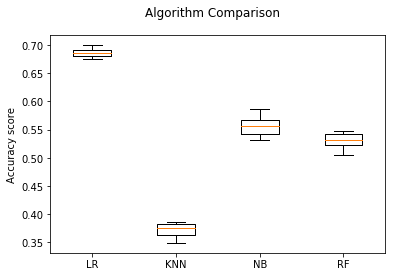

In [40]:
fig = plt.figure(figsize=(6,4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_ylabel('Accuracy score')
plt.show()

Logistic regression, gaussian naive bayes and random forest in boxplot above have the higher accuracy than k-nearest neighbours. So working on Logistic regression, gaussian naive bayes and random forest here is more efficient, but we are going to evaluate k-nearest neighbours to see the performance.

### Accuracy score on test set in each models

In [41]:
print('Testing accuracy on logistic regression model is: %.4f' % accuracyLR)
print('Testing accuracy on k-nearest neighbours model is: %.4f' % accuracyKN)
print('Testing accuracy on gaussian naive bayes model is: %.4f' % accuracyNB)
print('Testing accuracy on random forest classifier model is: %.4f' % accuracyRF)

Testing accuracy on logistic regression model is: 0.6862
Testing accuracy on k-nearest neighbours model is: 0.3657
Testing accuracy on gaussian naive bayes model is: 0.5667
Testing accuracy on random forest classifier model is: 0.6253


As can be seen above, accuracy score on logistic regression model is the highest among the four models followed by random forest classifier, gaussian naive bayes and k-nearest neighbours model. Logistic regression in this case is more accurate than the other models, though random forest classifier also accurate enough. In this case k-nearest neighbours is the less accurate model, but we will look more further on confusion matrix and metrics evaluation below.

### Confusion matrix on test set in each models using heatmap

In [42]:
# confusion matrix for each model
cm1=confusion_matrix(y_test, y_predLR)
cm2=confusion_matrix(y_test, y_predKN)
cm3=confusion_matrix(y_test, y_predNB)
cm4=confusion_matrix(y_test, y_predRF)

In [43]:
# for annotation
group_counts = ["{0:0.0f}".format(value) for value in
                cm1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm1.flatten()/np.sum(cm1)]
labels1 = [f"{v2}\n{v3}" for v2, v3 in
          zip(group_counts,group_percentages)]
labels1 = np.asarray(labels1).reshape(5,5)

Text(0.5, 51.0, 'Predicted class')

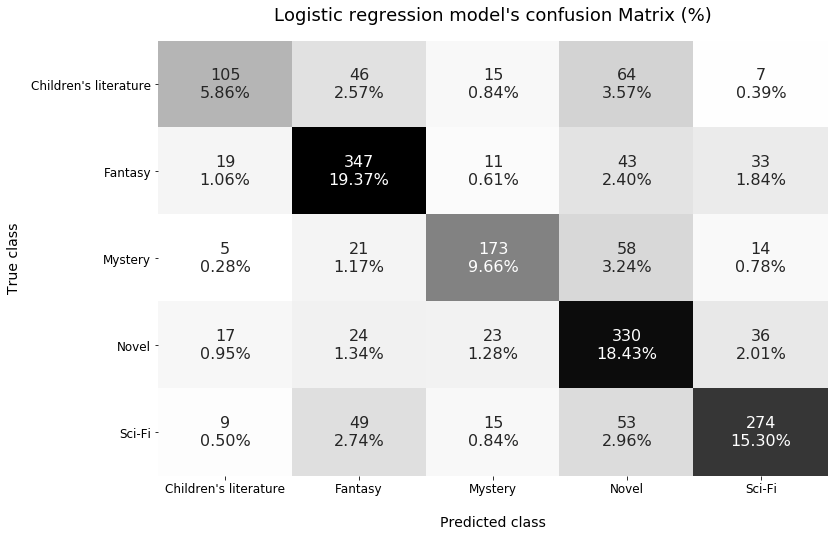

In [44]:
import seaborn as sns
plt.figure(figsize=(12,8))
ax = sns.heatmap(cm1, annot=labels1, fmt='', cmap='binary', annot_kws={'size':16}, cbar=False)
ax.set_xticklabels(["Children's literature",
                 'Fantasy',
                 'Mystery',
                 'Novel',
                 'Sci-Fi'], fontsize=12)
ax.set_yticklabels(["Children's literature",
                 'Fantasy',
                 'Mystery',
                 'Novel',
                 'Sci-Fi'], rotation='horizontal', fontsize=12)
ax.set_title("Logistic regression model's confusion Matrix (%)", fontsize=18, pad=20)
ax.set_ylabel('True class', fontsize=14, labelpad=10)
ax.set_xlabel('Predicted class', fontsize=14, labelpad=20)

As for logistic regression, the proportion of false positives and false negatives are low which are good, it means that misclassified class are very low. If we take Children's literature to evaluate, there are 7.37% of false positives and 2.79% of false negatives which are very low. As for the true positives, they are quite high which are good because it means that the model successfully predicted each class. 

In [45]:
# for annotation
group_counts = ["{0:0.0f}".format(value) for value in
                cm2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm2.flatten()/np.sum(cm2)]
labels2 = [f"{v2}\n{v3}" for v2, v3 in
          zip(group_counts,group_percentages)]
labels2 = np.asarray(labels2).reshape(5,5)

Text(0.5, 51.0, 'Predicted class')

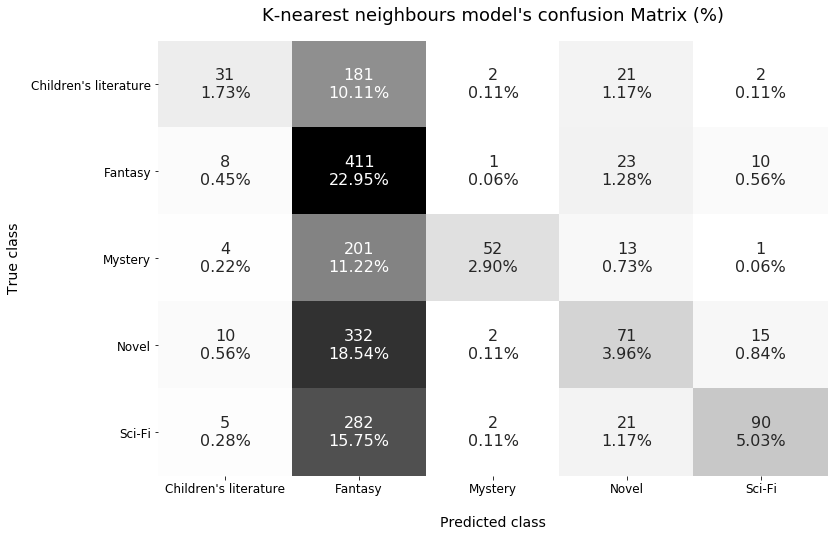

In [47]:
import seaborn as sns
plt.figure(figsize=(12,8))
ax = sns.heatmap(cm2, annot=labels2, fmt='', cmap='binary', annot_kws={'size':16}, cbar=False)
ax.set_xticklabels(["Children's literature",
                 'Fantasy',
                 'Mystery',
                 'Novel',
                 'Sci-Fi'], fontsize=12)
ax.set_yticklabels(["Children's literature",
                 'Fantasy',
                 'Mystery',
                 'Novel',
                 'Sci-Fi'], rotation='horizontal', fontsize=12)
ax.set_title("K-nearest neighbours model's confusion Matrix (%)", fontsize=18, pad=20)
ax.set_ylabel('True class', fontsize=14, labelpad=10)
ax.set_xlabel('Predicted class', fontsize=14, labelpad=20)

Here can be seen that the proportion of true positives are quite low which are not good except for Fantasy genre where it has 22.95% of true positives. The proportion of false positives and false negatives here are quite high. Also something interesting here is many predictions came into Fantasy genre, the model predicted more to Fantasy genre. Their numbers are quite high compared to the other genres which did not even reached 100 true positives. There are many misclassified class in this confusion matrix.

In [48]:
# for annotation
group_counts = ["{0:0.0f}".format(value) for value in
                cm3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm3.flatten()/np.sum(cm3)]
labels3 = [f"{v2}\n{v3}" for v2, v3 in
          zip(group_counts,group_percentages)]
labels3 = np.asarray(labels3).reshape(5,5)

Text(0.5, 51.0, 'Predicted class')

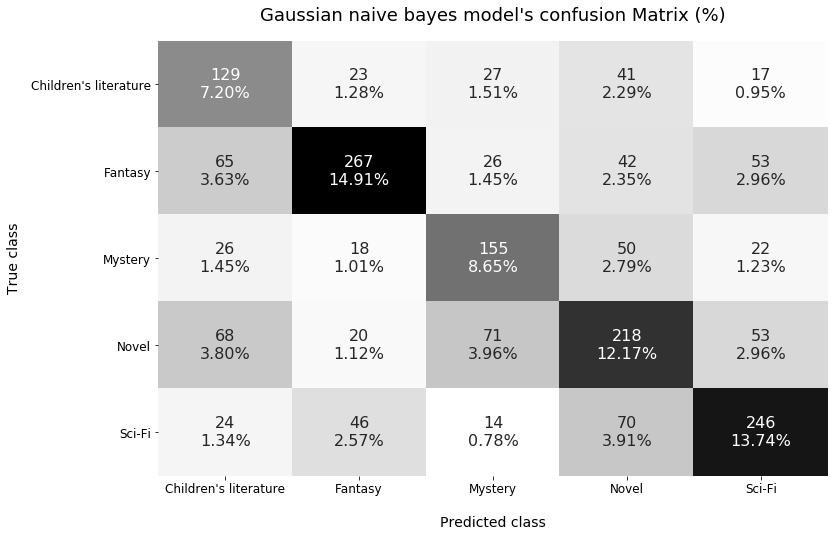

In [49]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(cm3, annot=labels3, fmt='', cmap='binary', annot_kws={'size':16}, cbar=False)
ax.set_xticklabels(["Children's literature",
                 'Fantasy',
                 'Mystery',
                 'Novel',
                 'Sci-Fi'], fontsize=12)
ax.set_yticklabels(["Children's literature",
                 'Fantasy',
                 'Mystery',
                 'Novel',
                 'Sci-Fi'], rotation='horizontal', fontsize=12)
ax.set_title("Gaussian naive bayes model's confusion Matrix (%)", fontsize=18, pad=20)
ax.set_ylabel('True class', fontsize=14, labelpad=10)
ax.set_xlabel('Predicted class', fontsize=14, labelpad=20)

The proportion of false positives and false negatives here are quite low which are good. If we take Children's literature to evaluate, it has 6.03% of false positives and 10.22% of false negatives. The proportion of false positives and false negatives here is not as good as in logistic regression model. As for true positives, the proportions are quite good. 

In [50]:
# for annotation
group_counts = ["{0:0.0f}".format(value) for value in
                cm4.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm4.flatten()/np.sum(cm4)]
labels4 = [f"{v2}\n{v3}" for v2, v3 in
          zip(group_counts,group_percentages)]
labels4 = np.asarray(labels4).reshape(5,5)

Text(0.5, 51.0, 'Predicted class')

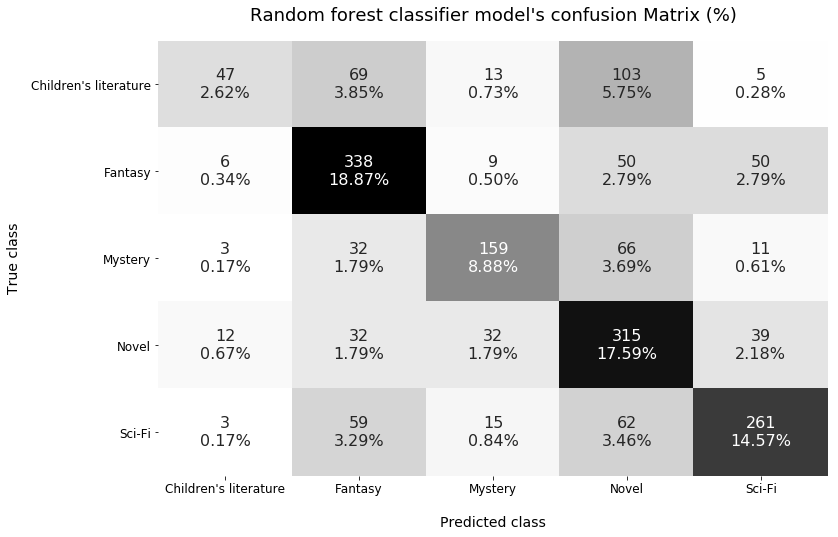

In [52]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(cm4, annot=labels4, fmt='', cmap='binary', annot_kws={'size':16}, cbar=False)
ax.set_xticklabels(["Children's literature",
                 'Fantasy',
                 'Mystery',
                 'Novel',
                 'Sci-Fi'], fontsize=12)
ax.set_yticklabels(["Children's literature",
                 'Fantasy',
                 'Mystery',
                 'Novel',
                 'Sci-Fi'], rotation='horizontal', fontsize=12)
ax.set_title("Random forest classifier model's confusion Matrix (%)", fontsize=18, pad=20)
ax.set_ylabel('True class', fontsize=14, labelpad=10)
ax.set_xlabel('Predicted class', fontsize=14, labelpad=20)

Here the proportion of false positives and false negatives can be considered low which is pretty good. The true positive for Children's literature are low which means the predictions are not identifying children's literature. Meanwhile for all other genres, their true positives proportion are quite high. It means that the model succeed in predicting the correct class. Misclassified class here are also very low.

### Evaluation metrics on test set in each models

In [55]:
# Making target names matching the encoded label
target_names=["Children's literature",
                 'Fantasy',
                 'Mystery',
                 'Novel',
                 'Science Fiction']

In [55]:
print("Logistic regression model's scores:")
print(classification_report(y_test, y_predLR, target_names=target_names))

Logistic regression model's scores:
                       precision    recall  f1-score   support

Children's literature       0.68      0.44      0.54       237
              Fantasy       0.71      0.77      0.74       453
              Mystery       0.73      0.64      0.68       271
                Novel       0.60      0.77      0.67       430
      Science Fiction       0.75      0.69      0.72       400

            micro avg       0.69      0.69      0.69      1791
            macro avg       0.69      0.66      0.67      1791
         weighted avg       0.69      0.69      0.68      1791



Here the highest precision score is Science Fiction genre followed by Mystery, Fantasy, Children's literature and Novel. The precision scores here are pretty good. It means the model's predictions on the correct genres are pretty good. As for recall score, Children's literature score is not high but not low either (0.44). For the others its quite high which is good. It means that the model's sensitivity on predicting the correct genres are pretty good. F1 scores here also pretty good though, for Children's literature its 0.54 which are the lowest among the others. 

In [69]:
print("K-nearest neighbours model's scores:")
print(classification_report(y_test, y_predKN, target_names=target_names))

K-nearest neighbours model's scores:
                       precision    recall  f1-score   support

Children's literature       0.53      0.13      0.21       237
              Fantasy       0.29      0.91      0.44       453
              Mystery       0.88      0.19      0.32       271
                Novel       0.48      0.17      0.25       430
      Science Fiction       0.76      0.23      0.35       400

            micro avg       0.37      0.37      0.37      1791
            macro avg       0.59      0.32      0.31      1791
         weighted avg       0.56      0.37      0.32      1791



Here the precision score are quite different from logistic regression model. Precision for Fantasy genre are low compared to other genres. The highest precision score here is for Mystery genre. As for recall score, all of the genres' score are quite low except for Fantasy (0.91). It means that the model's sensitivity on predicting correct genres is not really good. F1 scores here also are quite low.

In [66]:
print("Gaussian naive bayes model's scores:")
print(classification_report(y_test, y_predNB, target_names=target_names))

Gaussian naive bayes model's scores:
                       precision    recall  f1-score   support

Children's literature       0.41      0.54      0.47       237
              Fantasy       0.71      0.59      0.65       453
              Mystery       0.53      0.57      0.55       271
                Novel       0.52      0.51      0.51       430
      Science Fiction       0.63      0.61      0.62       400

            micro avg       0.57      0.57      0.57      1791
            macro avg       0.56      0.57      0.56      1791
         weighted avg       0.58      0.57      0.57      1791



Here the precision score for all genres are quite good except for Children's literature which fall a bit below 0.5. The highest score here is for Fantasy genre. Recall score here are more balanced, it ranged around 0.5 to 0.6. The recall score is good enough for the prediction sensitivity. F1 score here is not as good as logistic regression model, but its already good enough for predictions.

In [64]:
print("Random forest classifier model's scores:")
print(classification_report(y_test, y_predRF, target_names=target_names))

Random forest classifier model's scores:
                       precision    recall  f1-score   support

Children's literature       0.66      0.20      0.31       237
              Fantasy       0.64      0.75      0.69       453
              Mystery       0.70      0.59      0.64       271
                Novel       0.53      0.73      0.61       430
      Science Fiction       0.71      0.65      0.68       400

            micro avg       0.63      0.63      0.63      1791
            macro avg       0.65      0.58      0.59      1791
         weighted avg       0.64      0.63      0.61      1791



Precision score here is similar to logistic regression model, though it is lower here than the logistic regression model. The one thing to notice here is the score for Children's literature genre. Recall (0.20) and f1 score (0.31) for Children's literature genre are pretty low here. As for other genres, the overall scores are pretty good. The scores are quite high and model are accurate in predicting those.

### Overall comparison

By far, logistic regression gives a better accuracy than the two models followed by random forest classifer, gaussian naive bayes and the last is k-nearest neighbours. Looking at the accuracy and f1 score, logistic regression and gaussian naive bayes gives the best score which means it is good enough to predict genres. As for random forest classifier, recall and f1 score for Children's literature are quite low and not good enough. As for k-nearest neighbours, it is not balanced as the other two. Their recall score are also quite low except for fantasy which is why is not balanced.

## Conclusion

Logistic regression and gaussian naive bayes are the best model to work with the datasets as it have the higher accuracy and not overfitting. As for random forest classifier, although their accuracy is the second best among the models, their model sensitivity to predict Children's literature genre are not good. The f1 score for it is also not good enough. Thus, random forest classifier is not recommended. K-nearest neighbours have a quite low accuracy on predicting genres. Moreover, logistic regression had the best accuracy here which means that logistic regression should be used as one of the model. Gaussian naive bayes also perform well and good for predicting genres but not as good as logistic regression. K-nearest neighbours here performs well on particular genres, but have a bad overall performance.